In [1]:
import numpy as np
from deeplenstronomy.visualize import view_image, view_image_rgb
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2
from active_learner import ActiveLearner
x_space = np.linspace(0.01, 0.5, 500).reshape(-1, 1)

In [3]:
def policy_ucb(y_pred, sigma, x_space, y_train):
    beta = 1.96
    ucb_scores = -y_pred + beta * sigma
    return x_space[np.argmax(ucb_scores)]

def policy_random(y_pred, sigma, x_space, y_train):
    random_index = np.random.choice(len(x_space))
    return x_space[random_index]
    
def policy_ei(y_pred, sigma, x_space, y_train):
    best_y_so_far = np.min(y_train)
    sigma = np.maximum(sigma, 1e-9)
    improvement = best_y_so_far - y_pred
    Z = improvement / sigma
    ei_scores = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    return x_space[np.argmax(ei_scores)]

def policy_greedy(y_pred, sigma,x_space,y_train):
    next_design_index = np.argmin(y_pred)
    return x_space[next_design_index]

In [4]:
learner_ucb = ActiveLearner(x_space=x_space, acqui_policy=policy_ucb,simulation_params=5)
queried_X, queried_y = learner_ucb.run(total_queries=10, plot_progress=False)

Initialized naive noise inference pipeline for 5 parameters

 == START ACTIVE LEARNING ==

Selected acquisition policy policy_ucb
Performing 3 initial random queries
Iteration 4/10
  Surrogate trained on 3 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0631
Iteration 5/10
  Surrogate trained on 4 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0648
Iteration 6/10
  Surrogate trained on 5 points.
  Acquisition policy selected next design: noise_std = [0.01]
  Oracle returned performance (uncertainty): 0.0674
Iteration 7/10
  Surrogate trained on 6 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0623
Iteration 8/10
  Surrogate trained on 7 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0609
Iteration 9/10
  Surrogate t

Initialized naive noise inference pipeline for 5 parameters

 == START ACTIVE LEARNING ==

Selected acquisition policy policy_ei
Performing 3 initial random queries
Iteration 4/10


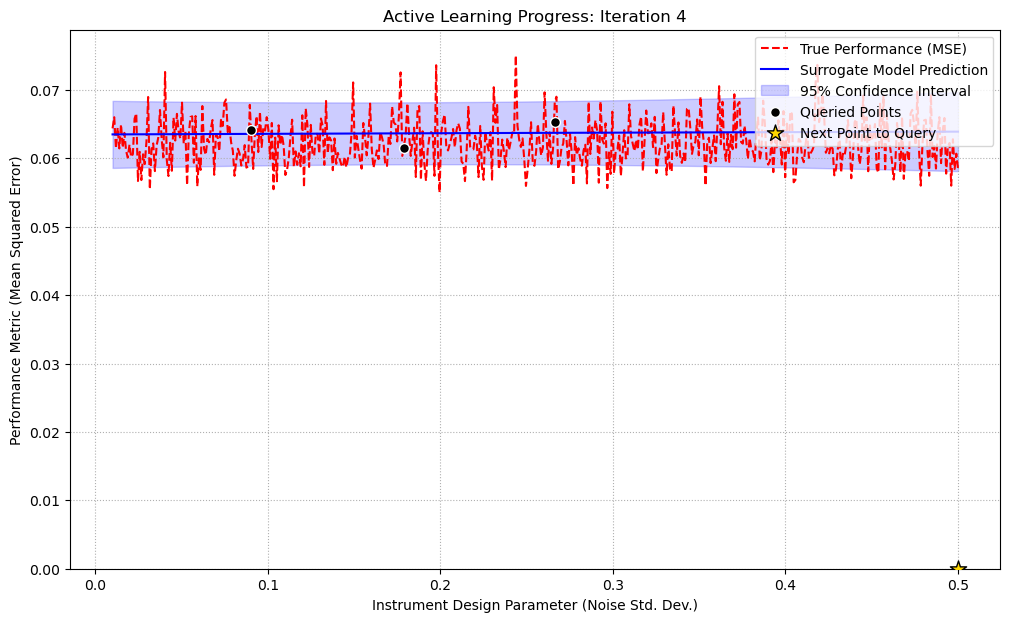

  Surrogate trained on 3 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0631
Iteration 5/10


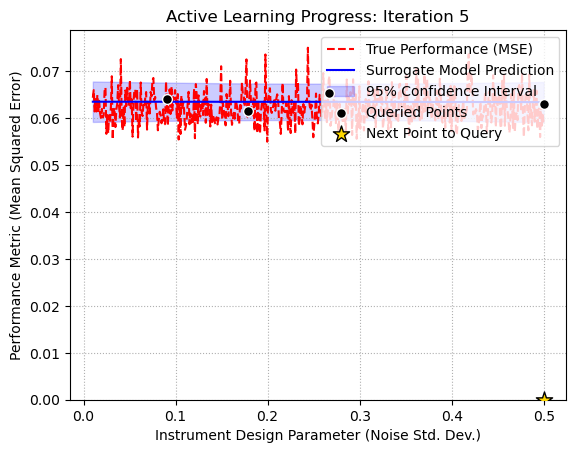

  Surrogate trained on 4 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0648
Iteration 6/10


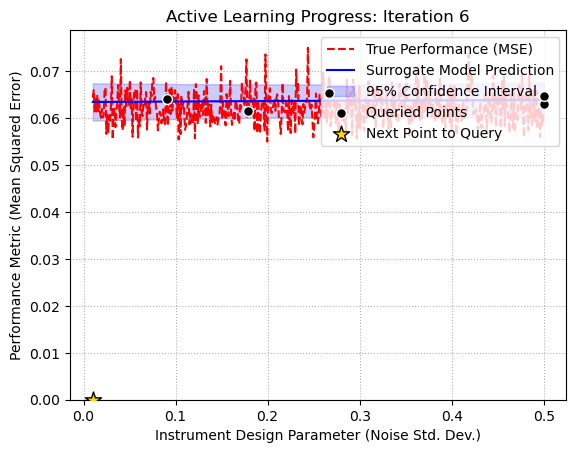

  Surrogate trained on 5 points.
  Acquisition policy selected next design: noise_std = [0.01]
  Oracle returned performance (uncertainty): 0.0674
Iteration 7/10


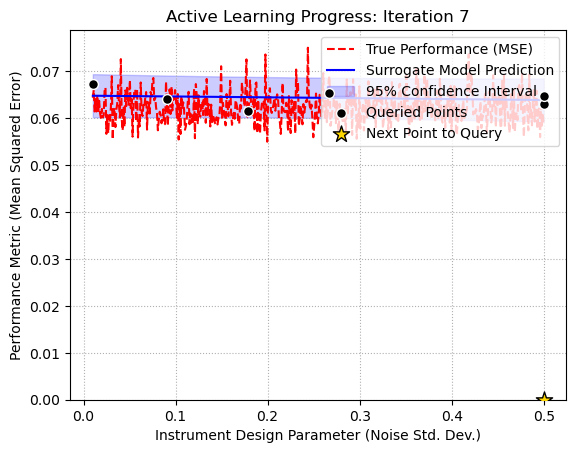

  Surrogate trained on 6 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0623
Iteration 8/10


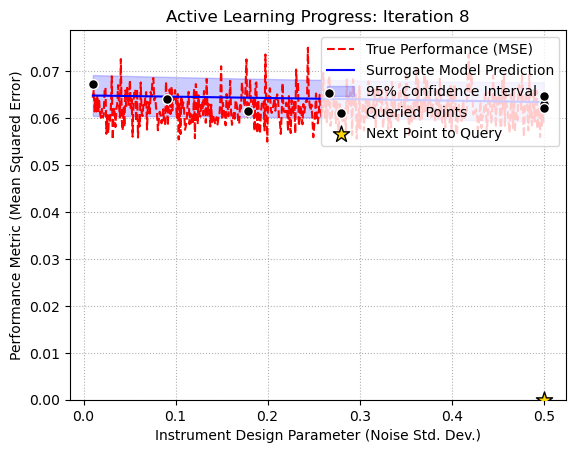

  Surrogate trained on 7 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0609
Iteration 9/10


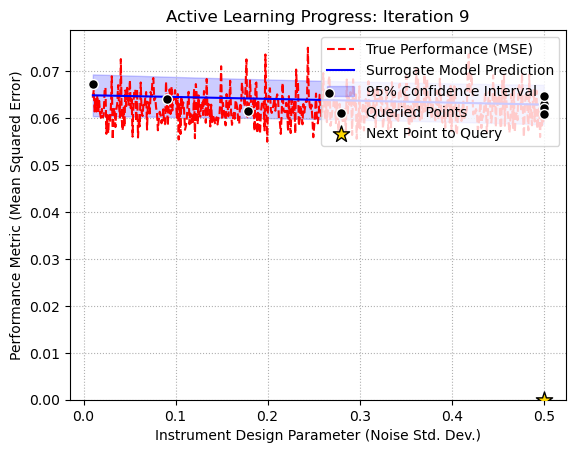

  Surrogate trained on 8 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0624
Iteration 10/10


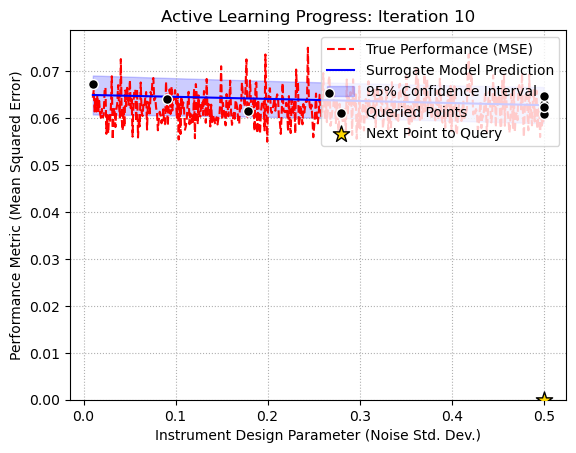

  Surrogate trained on 9 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0606


In [5]:
learner_ei = ActiveLearner(x_space=x_space, acqui_policy=policy_ei,simulation_params=5)
queried_X, queried_y = learner_ei.run(total_queries=10, plot_progress=True)

Initialized naive noise inference pipeline for 5 parameters

 == START ACTIVE LEARNING ==

Selected acquisition policy policy_random
Performing 3 initial random queries
Iteration 4/10


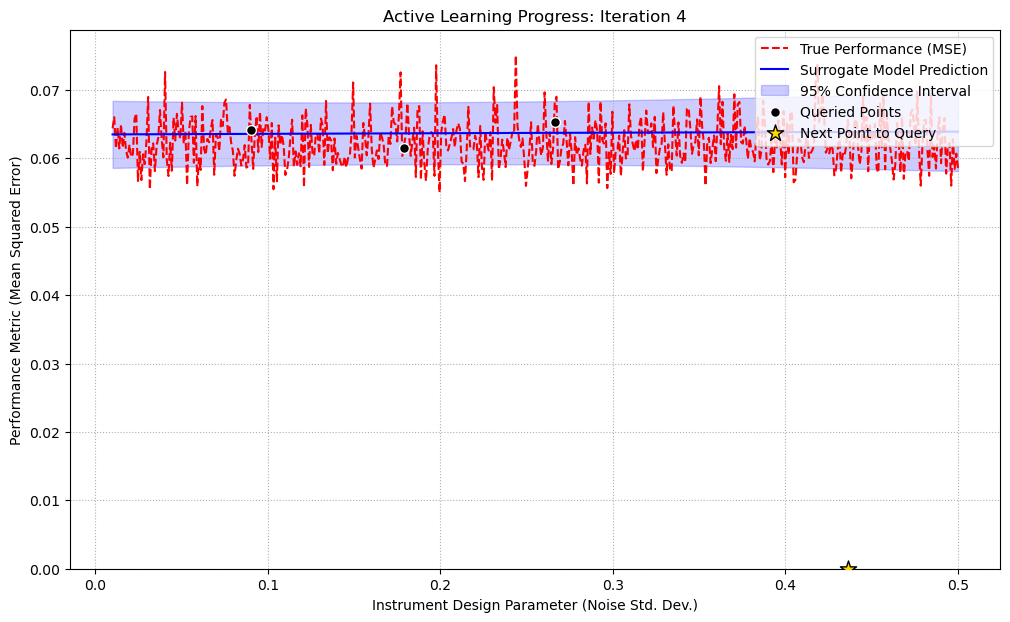

  Surrogate trained on 3 points.
  Acquisition policy selected next design: noise_std = [0.43617234]
  Oracle returned performance (uncertainty): 0.0609
Iteration 5/10


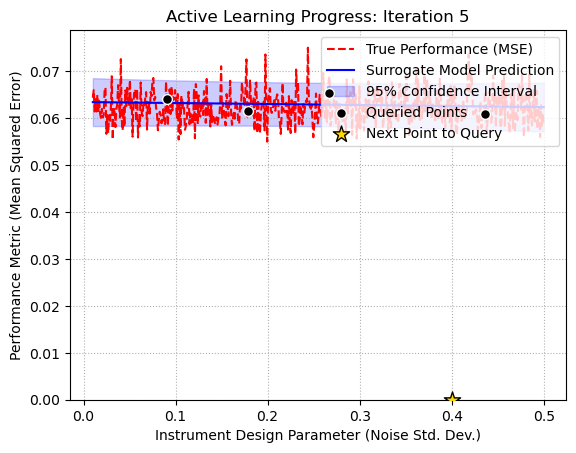

  Surrogate trained on 4 points.
  Acquisition policy selected next design: noise_std = [0.39983968]
  Oracle returned performance (uncertainty): 0.0639
Iteration 6/10


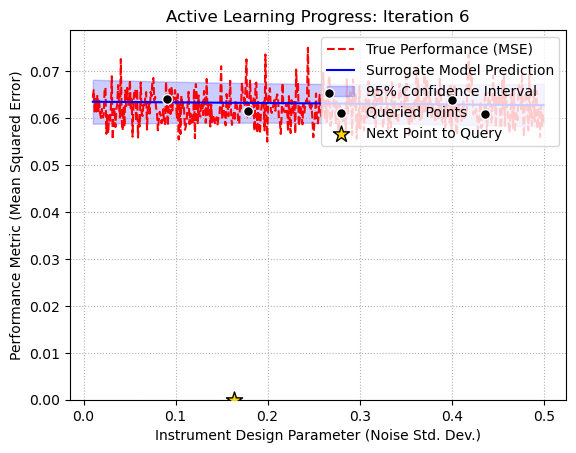

  Surrogate trained on 5 points.
  Acquisition policy selected next design: noise_std = [0.16318637]
  Oracle returned performance (uncertainty): 0.0609
Iteration 7/10


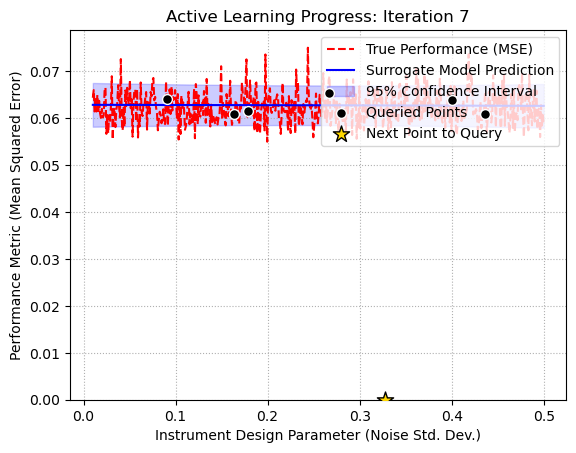

  Surrogate trained on 6 points.
  Acquisition policy selected next design: noise_std = [0.32717435]
  Oracle returned performance (uncertainty): 0.0653
Iteration 8/10


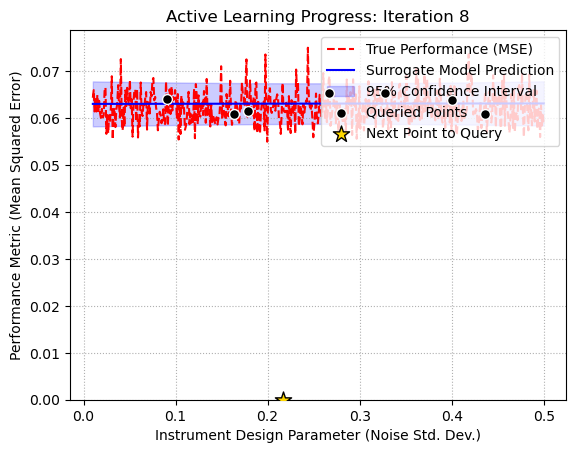

  Surrogate trained on 7 points.
  Acquisition policy selected next design: noise_std = [0.21621242]
  Oracle returned performance (uncertainty): 0.0594
Iteration 9/10


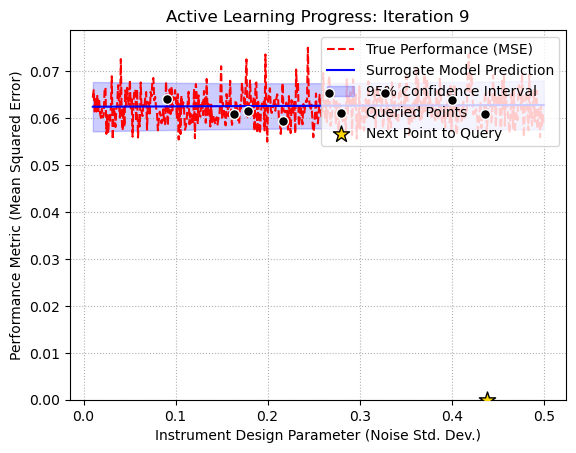

  Surrogate trained on 8 points.
  Acquisition policy selected next design: noise_std = [0.43813627]
  Oracle returned performance (uncertainty): 0.0635
Iteration 10/10


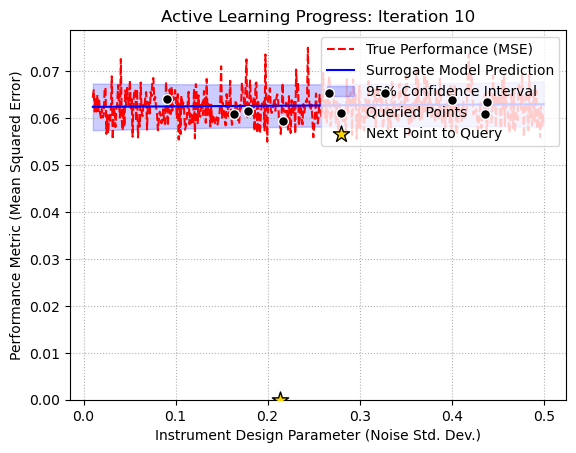

  Surrogate trained on 9 points.
  Acquisition policy selected next design: noise_std = [0.21326653]
  Oracle returned performance (uncertainty): 0.0627


In [6]:
learner_random = ActiveLearner(x_space=x_space, acqui_policy=policy_random,simulation_params=5)
queried_X, queried_y = learner_random.run(total_queries=10, plot_progress=True)

In [7]:
learner_greedy = ActiveLearner(x_space=x_space, acqui_policy=policy_greedy,simulation_params=5)
queried_X, queried_y = learner_greedy.run(total_queries=10, plot_progress=False)

Initialized naive noise inference pipeline for 5 parameters

 == START ACTIVE LEARNING ==

Selected acquisition policy policy_greedy
Performing 3 initial random queries
Iteration 4/10
  Surrogate trained on 3 points.
  Acquisition policy selected next design: noise_std = [0.01]
  Oracle returned performance (uncertainty): 0.0631
Iteration 5/10
  Surrogate trained on 4 points.
  Acquisition policy selected next design: noise_std = [0.01]
  Oracle returned performance (uncertainty): 0.0648
Iteration 6/10
  Surrogate trained on 5 points.
  Acquisition policy selected next design: noise_std = [0.01]
  Oracle returned performance (uncertainty): 0.0674
Iteration 7/10
  Surrogate trained on 6 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0623
Iteration 8/10
  Surrogate trained on 7 points.
  Acquisition policy selected next design: noise_std = [0.5]
  Oracle returned performance (uncertainty): 0.0609
Iteration 9/10
  Surrog